# Step01: Data Cleaning
In this notebook the Savant data will be imported and cleaned

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
pitches = pd.read_csv('../data/savant/madmax_all_cols_2019.csv')
madmax = pitches.copy()

In [3]:
madmax.head();

## Columns to lowercase and replace spaces with '_'

In [4]:
new_cols = []

for c in madmax.columns:
    c = c.lower()
    c = c.replace(' ', '_')
    c = c.replace('(', '')
    c = c.replace(')', '')
    c = c.replace('_°', '')
    new_cols.append(c)
    
madmax.columns = new_cols

In [5]:
madmax.shape

(2770, 89)

In [6]:
madmax.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

## Ok, there are 89 columns and not all are important for this experiement.  Let's make a few prelininary column removals.

### Of the 89 columns, the following pertain to the experiment:
- pitch_type
- game_date (for purposes of discovering the sequential order of pitches for creatin of new features)
- release_speed
- events 
- description
- zone
- des
- stand
- home_team
- away_team
- type
- balls
- strikes
- on_3b
- on_2b
- on_1b
- outs_when_up
- inning
- inning_topbot
- sv_id
- release_spin_rate
- pitch_number
- pitch_name
- home_score
- away_score
- bat_score
- fld_score
- if_fielding_alignment
- of_fielding_alignment

In [7]:
keep_cols = ['pitch_type', 'game_date', 'release_speed', 'events', 'description', 'zone', 'des', 'stand',
            'home_team', 'away_team', 'type', 'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up',
            'inning', 'inning_topbot', 'sv_id', 'release_spin_rate', 'pitch_number', 'pitch_name', 'bat_score', 
             'fld_score', 'if_fielding_alignment', 'of_fielding_alignment']

In [8]:
madmax = madmax[keep_cols]

In [9]:
madmax.columns

Index(['pitch_type', 'game_date', 'release_speed', 'events', 'description',
       'zone', 'des', 'stand', 'home_team', 'away_team', 'type', 'balls',
       'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'sv_id', 'release_spin_rate', 'pitch_number',
       'pitch_name', 'bat_score', 'fld_score', 'if_fielding_alignment',
       'of_fielding_alignment'],
      dtype='object')

## Columns look good, lets go through the data one column at a time
We will review the data in each column in order to assess its importance, the handling of null values, and any other issues we may come across

In [10]:
madmax.sort_values(by='sv_id')
# sv_id functions as an ID that sorts pitches over time.  Order will be required to pitch count calculations.

,pitch_type,game_date,release_speed,events,description,zone,des,stand,home_team,away_team,...,inning,inning_topbot,sv_id,release_spin_rate,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
2769,FF,2019-03-28,93.7,NaN,called_strike,6.0,NaN,L,WSH,NYM,...,1,Top,190328_170717,2584.0,1,4-Seam Fastball,0,0,Infield shift,Standard
2768,FF,2019-03-28,94.2,NaN,swinging_strike,5.0,NaN,L,WSH,NYM,...,1,Top,190328_170732,2545.0,2,4-Seam Fastball,0,0,Infield shift,Standard
2767,FF,2019-03-28,96.3,strikeout,swinging_strike,5.0,Brandon Nimmo strikes out swinging.,L,WSH,NYM,...,1,Top,190328_170752,2738.0,3,4-Seam Fastball,0,0,Infield shift,Standard
2766,SL,2019-03-28,85.6,NaN,swinging_strike,6.0,NaN,R,WSH,NYM,...,1,Top,190328_170825,2370.0,1,Slider,0,0,Infield shift,Standard
2765,FF,2019-03-28,95.5,NaN,ball,12.0,NaN,R,WSH,NYM,...,1,Top,190328_170842,2632.0,2,4-Seam Fastball,0,0,Infield shift,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,CU,2019-09-24,79.1,NaN,foul,4.0,NaN,R,WSH,PHI,...,6,Top,190925_005705,2818.0,2,Curveball,4,2,Standard,Standard
3,SL,2019-09-24,84.8,NaN,ball,14.0,NaN,R,WSH,PHI,...,6,Top,190925_005726,2295.0,3,Slider,4,2,Standard,Standard
2,FF,2019-09-24,97.4,NaN,foul,8.0,NaN,R,WSH,PHI,...,6,Top,190925_005750,2465.0,4,4-Seam Fastball,4,2,Standard,Standard
1,CH,2019-09-24,84.4,single,hit_into_play_no_out,9.0,Scott Kingery singles on a soft ground ball to...,R,WSH,PHI,...,6,Top,190925_005823,1494.0,5,Changeup,4,2,Standard,Standard


### pitch_type
- Variable type: Dependant, Categorical
- Data type: string
- Unique values: 5
- Adding to target list

In [11]:
targets = ['pitch_type']

In [12]:
madmax.pitch_type.value_counts()

FF    1341
SL     573
CH     401
CU     241
FC     214
Name: pitch_type, dtype: int64

Based on the following link, Max throws five different types of pitches <br>
https://library.fangraphs.com/pitch-type-abbreviations-classifications/ <br><br>
__Max's Pitch Repertoire in 2019__
- FF: Four Seam Fastball
- SL: Slider
- CH: Changeup
- CU: Curveball
- FC: Fastball (Cutter)

This will ultimatly be one of two targets in this study.  Looks like Max's go to pitch is the four seam fastball with the changeup and curveball representing minority classes.

### game_date

In [13]:
# Following provides total pitch count per game
# Will later make date either a month category or a seasonal category (spring, summer, fall)
madmax.game_date.value_counts();

### release_speed
- Variable type: TBD, Continuous
- Data type: Float
- Number of unique Values: n/a

In [14]:
len(madmax.release_speed.value_counts())

226

In [15]:
madmax.release_speed.min(), madmax.release_speed.max()

(74.5, 98.4)

In [16]:
r = madmax.release_speed.max() - madmax.release_speed.min()
r/5

4.780000000000001

#### These velocities relate directly to pitch types, let's take a look at these values together

In [17]:
pitches = madmax.pitch_type.unique()
pitches

array(['FF', 'CH', 'SL', 'CU', 'FC'], dtype=object)

In [18]:
results = {}
p_count = 1
for p in pitches:
    avg = madmax.loc[(madmax.pitch_type == p)].release_speed.mean()
    low = madmax.loc[(madmax.pitch_type == p)].release_speed.min()
    high = madmax.loc[(madmax.pitch_type == p)].release_speed.max()
    i = str('p{}'.format(p_count))
    results[i] = [p, avg, low, high]
    p_count += 1 

In [19]:
results = pd.DataFrame(results).T
results.columns = ['pitch_type', 'mean', 'min', 'max']
results

,pitch_type,mean,min,max
p1,FF,94.8526,87.3,98.4
p2,CH,84.2728,80.5,89.3
p3,SL,85.5663,82.5,88.4
p4,CU,78.5471,74.5,81.9
p5,FC,89.8257,87,93.9


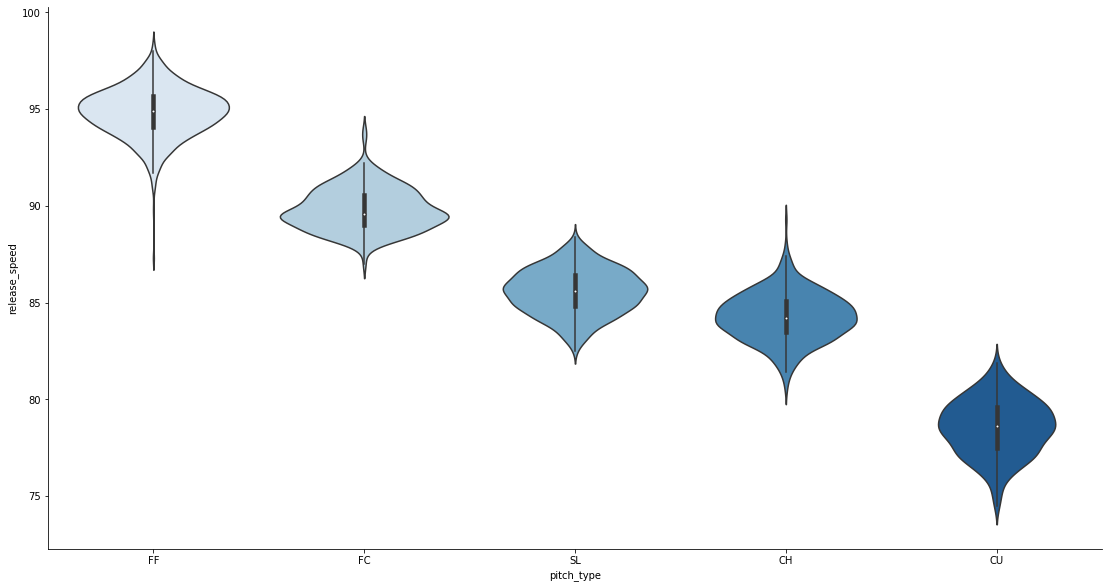

In [60]:
vio = sns.catplot(x = 'pitch_type', 
            y = 'release_speed', 
            kind = 'violin', 
            data=madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

vio.savefig('./viz/pitch_type_speed_violins.png')

### Key takeaway: Consider combining the slider and curveball pitches to one category
- Good separation between four seem fastball, fastball cutter, and the change up
- The slider and curveball exhibit closer mph than other pitches

### events
- This will be an interesting feature for other experiments, but not for this one
- Adding to a kill_col list that will be used to drop all killed columns in one line at the end of this notebook

In [21]:
madmax.events.value_counts();

In [22]:
kill_cols = ['events']

### description
- Same as events just above

In [23]:
kill_cols.append('description')

### des
- Don't need this columns after inspection
    - Same reasons as events and description

In [24]:
kill_cols.append('des')

### release_spin_rate
- Variable type: Independant, Continuous
- Data type: Int
- Unique Values: n/a

In [25]:
madmax.release_spin_rate.describe();

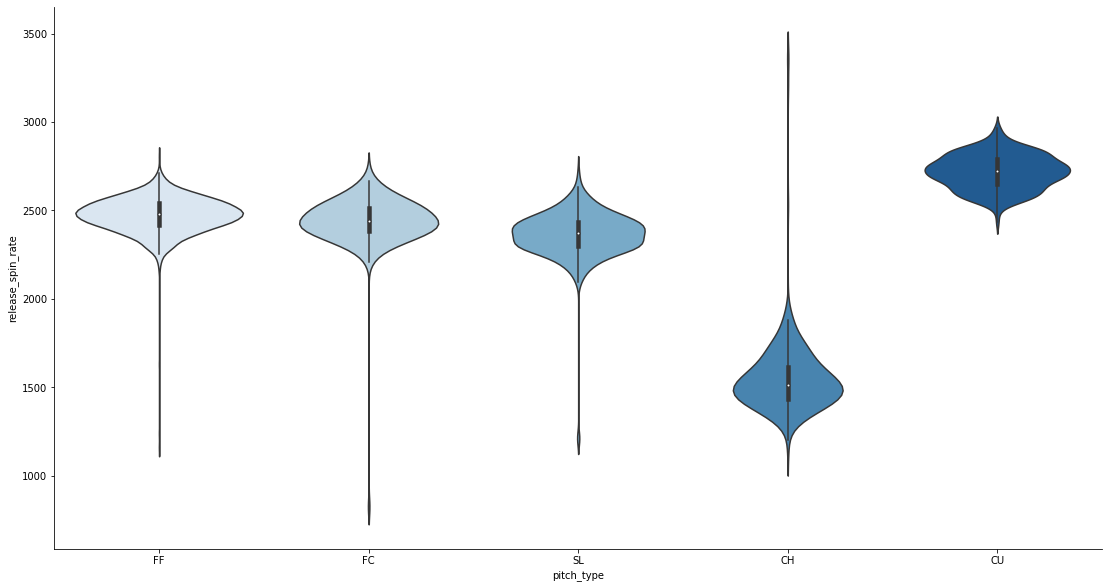

In [61]:
cat = sns.catplot(x = 'pitch_type', 
            y = 'release_spin_rate', 
            kind = 'violin', 
            data=madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

cat.savefig('./viz/pitch_type_spin_violins.png')

Wow, Mad Max's spin rate is similar for his four-seam fastball, cutter, and slider.  All though his curveball is close, to these other three values, his changeup appears to spin much less than his other pitches.

### stand
- Is R or L for the handedness of the batter
- Will be a categorical, independant variable
- Relativley even totals between the two classes

In [27]:
madmax.stand.value_counts()

R    1438
L    1332
Name: stand, dtype: int64

### zone
- Variable type: Independant, Continuous
- Data type: Int
- Number unique Values: 13
    - This is an integral dependant variable in the experiment and indicates where the pitch is thrown in or out of the strike zone
    - These number 1 - 14 
    - For example, with a right-handed hitter zone 3 is high and inside whereas for a left-handed hitter zone 3 is high and outside
    
<br>
<img src='../images/statcast_zones.png' alt='Drawing' style='width: 450px;'/><br>

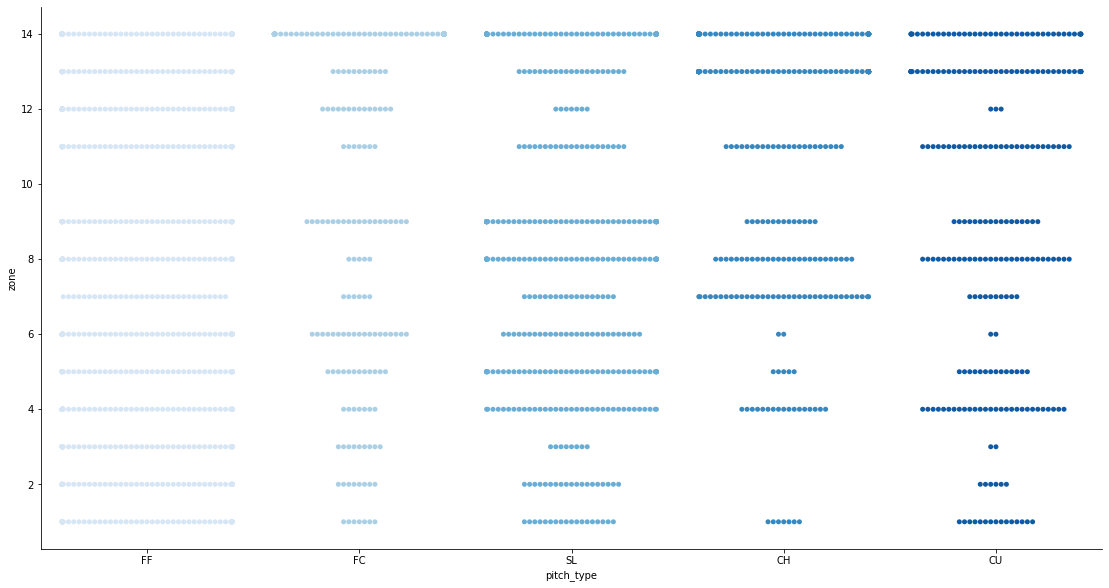

In [62]:
zone = sns.catplot(x = 'pitch_type', 
            y = 'zone', 
            kind = 'swarm', 
            data=madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

zone.savefig('./viz/pitch_type_zone_swarm.png')

 __Key Takeaway:__ Need to consider combining zone with handedness of the batter to discern "inside" or "outside" categories vs. numeric values

### home_team
- Will be an interesting feature to explore in relation to the Nationals only

In [29]:
madmax.home_team.value_counts()

WSH    1518
NYM     209
MIA     202
CIN     120
DET     115
LAD     115
MIL     112
STL     109
SD      101
ATL      98
PIT      71
Name: home_team, dtype: int64

### nats_home1_away0 (new feature)

In [30]:
madmax['nats_home1_away0'] = madmax.home_team.apply(lambda h: 1 if h == 'WSH' else 0)

In [31]:
madmax.nats_home1_away0.value_counts()

1    1518
0    1252
Name: nats_home1_away0, dtype: int64

### away_team
- Don't need this column as home_team indicates if the Nats are home or away

In [32]:
kill_cols.append('away_team')

### type column
- Indicates if the pitch was a ball (taken), strike (taken), or a hit (indicated with X)
- Result of pitch occurs after the pitch and does not relate to location so will be removed

In [33]:
madmax.type.value_counts()

S    1503
B     858
X     409
Name: type, dtype: int64

In [34]:
kill_cols.append('type')

### balls
- When combined with strikes, the count of the pitch is created
- Will be key categorical, independant variable
- After new column creation, feature no longer need and to be added to kill_cols

In [35]:
kill_cols.append('balls')

### strikes
- When combined with balls, creates the count
- Will be key categorical, independant variable
- After new column creation, feature no longer need and to be added to kill_cols

In [36]:
kill_cols.append('strikes')

### balls_strikes (new feature)
- Combines balls and strikes as a string/Pandas object

In [37]:
madmax['balls_strikes'] = madmax.balls.astype(str) + '_' + madmax.strikes.astype(str)

In [38]:
madmax.balls_strikes.value_counts()

0_0    692
0_1    432
1_2    308
1_1    261
0_2    254
2_2    235
1_0    201
3_2    157
2_1    119
2_0     55
3_1     40
3_0     16
Name: balls_strikes, dtype: int64

Wow, Mad Max only had sixteen 3-0 counts in the 2019 regular season?  That is impressive.

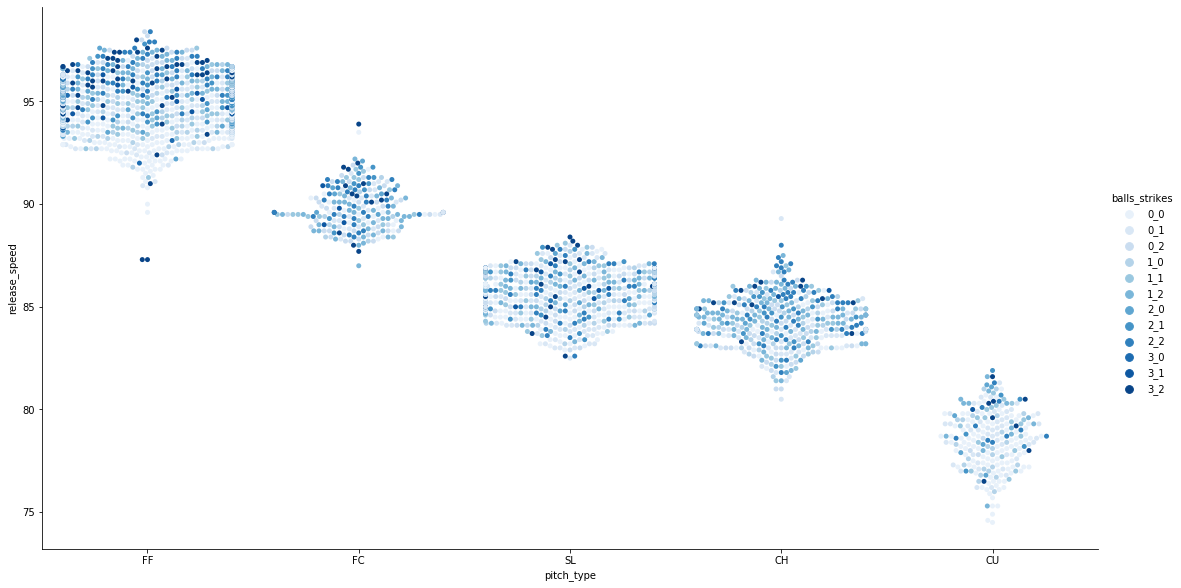

In [63]:
counts = sns.catplot(x = 'pitch_type', 
            y = 'release_speed', 
            kind = 'swarm', 
            data = madmax, 
            order = ['FF', 'FC', 'SL', 'CH', 'CU'], 
            palette = 'Blues',
            hue = 'balls_strikes',
            height = 8.27, 
            aspect = 15/8);

counts.savefig('./viz/pitch_type_speed_count_swarm.png')

__Key Takeaway__: On superficial inspection, it looks like random spread of pitch selection and velocity by count values

### on_3b
- null if no runner on 3rd base and player ID of plyer on 3rd if occupied
- Will change to 0 if empty and 1 if occupied for this experiment

In [40]:
madmax.on_3b = madmax.on_3b.fillna(value=0)

In [41]:
madmax.on_3b

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2765    0.0
2766    0.0
2767    0.0
2768    0.0
2769    0.0
Name: on_3b, Length: 2770, dtype: float64

In [42]:
madmax.on_3b = madmax.on_3b.apply(lambda r3: 0 if r3 == 0 else 1)

In [43]:
madmax.on_3b.value_counts()

0    2587
1     183
Name: on_3b, dtype: int64

### on_2b
- Same treatment as on_3b

In [44]:
madmax.on_2b = madmax.on_2b.fillna(value=0)
madmax.on_2b
madmax.on_2b = madmax.on_2b.apply(lambda r2: 0 if r2 == 0 else 1)
madmax.on_2b.value_counts()

0    2313
1     457
Name: on_2b, dtype: int64

### on_1b
- Same treatment as on_3b

In [45]:
madmax.on_1b = madmax.on_1b.fillna(value=0)
madmax.on_1b
madmax.on_1b = madmax.on_1b.apply(lambda r1: 0 if r1 == 0 else 1)
madmax.on_1b.value_counts()

0    2115
1     655
Name: on_1b, dtype: int64

### all_runners (new feature)
- Combines on_1b, on_2b, and on_3b as one, categorical variable

In [46]:
madmax.all_runners = 'fb:' + madmax.on_1b.astype(str) + '_' + \
                            'sb:' + madmax.on_2b.astype(str) + '_' +\
                            'tb:' + madmax.on_3b.astype(str)

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
madmax.all_runners.value_counts()

fb:0_sb:0_tb:0    1754
fb:1_sb:0_tb:0     446
fb:0_sb:1_tb:0     257
fb:1_sb:1_tb:0     130
fb:1_sb:0_tb:1      59
fb:0_sb:0_tb:1      54
fb:0_sb:1_tb:1      50
fb:1_sb:1_tb:1      20
dtype: int64

Wow, Mad Max only had the bases loaded twenty times all season, impressive.

### outs_when_up
- Outs when batter is at the plate
- Quantities of each class are close in aggregate value

In [48]:
madmax.outs_when_up.value_counts()

1    941
2    925
0    904
Name: outs_when_up, dtype: int64

### inning
- Indicates what inning the pitch was thrown

In [49]:
madmax.inning.value_counts()

1    460
4    444
2    438
3    424
5    403
6    309
7    218
8     74
Name: inning, dtype: int64

### inning_topbot
- Don't need this feature as it results from the Nats being home or away
- Adding to kill_cols

In [50]:
kill_cols.append('inning_topbot')

### sv_id
- Used to order pitches chronologically when ascending
- Will be retained until ordering pitches is no longer neccessary

### pitch_number
- Equals the running count of pitches thrown to the batter in that appearance;
- Resets with each new batter

In [51]:
madmax.pitch_number

0       1
1       5
2       4
3       3
4       2
       ..
2765    2
2766    1
2767    3
2768    2
2769    1
Name: pitch_number, Length: 2770, dtype: int64

### pitch_name
- Redundant column for pitch_type column
- Will remove

In [52]:
kill_cols.append('pitch_name')

### bat_score
- Score of batting team aka not the Nats
- Will change to opp_score (opponent score)

In [53]:
madmax = madmax.rename(columns={'bat_score': 'opp_score'})

### fld_score
- Score of fielding team aka the Nats
- Will change to nat_score

In [54]:
madmax = madmax.rename(columns={'fld_score': 'nats_score'})

### if_fielding_alignment
- Indicates standard or shift of the infield

In [55]:
madmax.if_fielding_alignment.value_counts()

Standard         2026
Infield shift     589
Strategic         154
Name: if_fielding_alignment, dtype: int64

### of_fielding_alignment
- Indicates standard or shift of the outfield

In [56]:
madmax.of_fielding_alignment.value_counts()

Standard     2611
Strategic     158
Name: of_fielding_alignment, dtype: int64

## That's a good start to our data set, at this point, we will export to csv and continue in the next step

In [57]:
madmax.to_csv('../data/processed/madmax_cleaned.csv')